In [68]:
import math
import random as rnd
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import clear_output,display, HTML
from time import sleep
import ipywidgets as widgets 
import networkx as nx
import numpy as np
from matplotlib.colors import ListedColormap
from scipy import stats, mean
dbug = True
plt.rcParams["figure.figsize"] = (16,8)  

In [95]:
class Agent:
    def __init__(self,id,bw,ei=0,pa=0):
        self.id = id
        self.bw = bw
        self.ei = ei
        self.pa = (ei*0.9)/(0.083*bw+0.85)
        self.links=[]
        
    def add_edge(self,agent):
        if agent != self:
            if agent not in self.links:
                self.links.append(agent)
                       

In [96]:

data_file = open("BW.csv")
bw_data_2009=np.array([ float(x) for x in data_file ]) 
data_file = open("EI.csv")
ei_data_2009=np.array([ float(x) for x in data_file ]) 
data_file = open("Change_BW.csv")
bw_data_2011=np.array([ float(x) for x in data_file ]) 
t_stat, p_val = stats.ttest_ind(data_2009,data_2011, equal_var=True)

print("Number of agents:",len(bw_data_2009))
lab = "Mean bw_2009:{:.2f}kg  Stdv {:.4f} Mean bw_2011:{:.2f}kg  p:{:.4f}"
print(lab.format(bw_data_2009.mean(),bw_data_2009.std(),bw_data_2011.mean(),p_val))
lab = "Mean ei_2009:{:.2f} Stdv {:.4f}"
print(lab.format(ei_data_2009.mean(),ei_data_2009.std()))

Number of agents: 2197
Mean bw_2009:61.73kg  Stdv 11.2576 Mean bw_2011:62.51kg  p:0.0198
Mean ei_2009:8.51 Stdv 1.2805


In [97]:
number_of_links = 3
agents= [Agent(i,bw_data_2009[i],ei=ei_data_2009[i]) for i in range(len(data_2009))]
network = nx.erdos_renyi_graph(len(agents),number_of_links/len(agents))

In [98]:
edges = list(network.edges())
for edge in edges:
    a1 = agents[edge[0]]
    a2 = agents[edge[1]]
    a1.add_edge(a2)
    a2.add_edge(a1)
                

In [99]:
network_agent = nx.Graph()
for a in agents:
    network_agent.add_node(a.id)
for a in agents:
    for b in a.links:
        network_agent.add_edge(a.id,b.id)

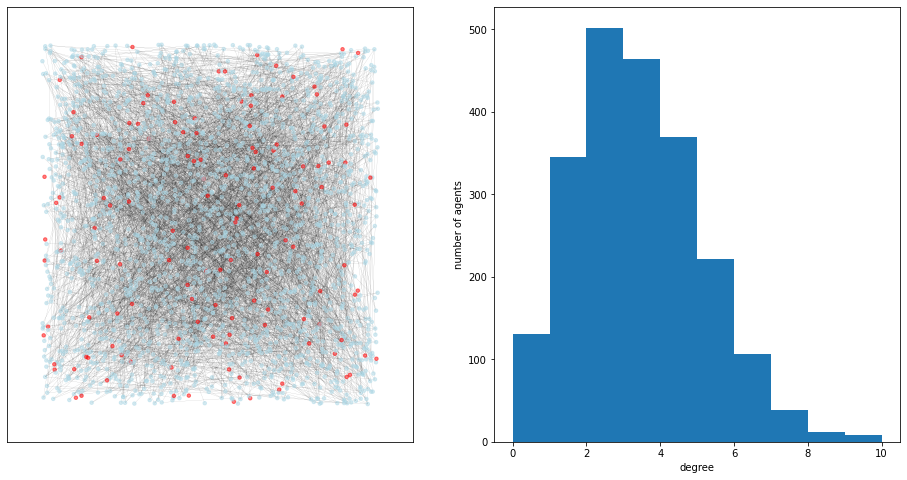

Mean degree: 2.91 Number of clusters: 141 Single nodes: 131 
Largest component size: 2047


In [100]:
# get largest component
gcc = sorted(nx.connected_components(network), key=len, reverse=True)
g0 = network.subgraph(gcc[0])

#get degree distribution
degree = dict(network.degree())
values = np.array([ value for k,value in degree.items()])
color = ["red" if len(a.links)==0 else "lightblue" for a in agents]
number_single = color.count("red")
plt.subplot(1,2,1)
pos = nx.random_layout(network)
nx.draw_networkx(network, pos=pos,node_color = color,with_labels=False,alpha=0.5, node_size=12,width=0.1,font_size=8) 
plt.subplot(1,2,2)
plt.ylabel("number of agents")
plt.xlabel("degree")
plt.hist(values)
plt.show()
label = "Mean degree: {:.2f} Number of clusters: {} Single nodes: {} "
print(label.format(values.mean(),len(gcc),number_single))
print("Largest component size:",len(gcc[0]))
# for i, g in enumerate(gcc):
#     label = "Cluster: {}  size:{}"
#     print(label.format(i,len(g)))

In [104]:
pa = np.array([a.pa for a in agents]) 

In [110]:
label = "Mean pa: {:.2f}  stdev: {:.2f}"
print(label.format(pa.mean(),pa.std()))

Mean pa: 1.29  stdev: 0.13
